Ce notebook a été entièrement réalisé par Maximiliano Ruiz.

In [1]:
import os 
os.chdir("/Users/maximilianoruiz/Desktop/TER - Redshift/Données")
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fichiers_npz = glob.glob('*.npz')
print(f"📂 Fichiers .npz trouvés ({len(fichiers_npz)}):")
for i, fichier in enumerate(fichiers_npz):
    print(f"  {i+1}. {fichier}")

# Filtrer les fichiers contenant "COSMOS"
cosmos_files = [f for f in fichiers_npz if "COSMOS" in f]
print(f"Fichiers COSMOS ({len(cosmos_files)}):")
for i, fichier in enumerate(cosmos_files):
    print(f"  {i+1}. {fichier}")

# Charger les données des fichiers COSMOS
data_list = []
for fichier in cosmos_files:
    try:
        data = np.load(fichier, allow_pickle=True)
        data_list.append(data)
        print(f"✅ Chargé: {fichier}")
    except Exception as e:
        print(f"❌ Erreur en chargeant {fichier}: {e}")
        print(f"Total de fichiers COSMOS chargés: {len(data_list)}")

# Vérifier les clés des données chargées
for i, data in enumerate(data_list):
    print(f"\nClés dans le fichier {cosmos_files[i]}:")
    for key in data.keys():
        print(f"  - {key}")
        # Exemple d'accès aux données
        print(f"    Shape de {key}: {data[key].shape}")



📂 Fichiers .npz trouvés (8):
  1. XMM_LSS_v11_uijk_0177_spec_UD.npz
  2. COSMOS_v11_uijk_0001_photo_D.npz
  3. XMM_LSS_v11_uijk_0162_phot_UD.npz
  4. COSMOS_v11_uijk_0020_spec_D.npz
  5. COSMOS_v11_uijk_0073_spec_UD.npz
  6. XMM_LSS_v11_uijk_0162_phot_D.npz
  7. COSMOS_v11_uijk_0213_photo_UD.npz
  8. XMM_LSS_v11_uijk_0006_spec_D.npz
Fichiers COSMOS (4):
  1. COSMOS_v11_uijk_0001_photo_D.npz
  2. COSMOS_v11_uijk_0020_spec_D.npz
  3. COSMOS_v11_uijk_0073_spec_UD.npz
  4. COSMOS_v11_uijk_0213_photo_UD.npz
✅ Chargé: COSMOS_v11_uijk_0001_photo_D.npz
✅ Chargé: COSMOS_v11_uijk_0020_spec_D.npz
✅ Chargé: COSMOS_v11_uijk_0073_spec_UD.npz
✅ Chargé: COSMOS_v11_uijk_0213_photo_UD.npz

Clés dans le fichier COSMOS_v11_uijk_0001_photo_D.npz:
  - cube
    Shape de cube: (12054, 64, 64, 9)
  - info
    Shape de info: (12054,)
  - flag
    Shape de flag: (12054, 9)

Clés dans le fichier COSMOS_v11_uijk_0020_spec_D.npz:
  - cube
    Shape de cube: (15, 64, 64, 9)
  - info
    Shape de info: (15,)
  - flag

In [3]:
n_afficher = 1  # On affiche seulement le premier objet

for idx, data in enumerate(data_list):
    print(f"\n--- Fichier : {cosmos_files[idx]} ---")
    print("Clés disponibles :", list(data.keys()))

    # Afficher les clés et valeurs de 'info' pour le premier objet
    if 'info' in data:
        info = data['info']
        print("Valeurs de 'info' pour l'objet 0 :")
        if hasattr(info, 'dtype') and info.dtype.names:
            for key in info.dtype.names:
                print(f"{key} : {info[0][key]}")
        else:
            print(info[0])
    else:
        print("Pas de variable 'info' dans ce fichier.")

    # Afficher la valeur du flag pour le premier objet
    if 'flag' in data:
        flag = data['flag']
        print(f"flag : {flag[0]}")
    else:
        print("Pas de variable 'flag' dans ce fichier.")

    # Afficher les infos sur le premier objet du cube
    if 'cube' in data:
        cube_data = data['cube']
        print(f"Cube : shape={cube_data.shape}")
        print(f"Objet 0 : type={type(cube_data[0])}, shape={cube_data[0].shape}")
    else:
        print("Pas de variable 'cube' dans ce fichier.")


--- Fichier : COSMOS_v11_uijk_0001_photo_D.npz ---
Clés disponibles : ['cube', 'info', 'flag']
Valeurs de 'info' pour l'objet 0 :
ID : 0
RA : 149.41077415981383
DEC : 2.8837678646168765
TRACT : 10054
PATCH : b'0,0'
MASK : 0
FLAG_FIELD : 7
EB_V : 0.01756735906672505
CLASS_STAR_HSC_I : 0.35145360231399536
u : 27.456
uS : 27.865
g : 27.788
r : 28.223
i : 28.558
z : 26.957
y : 27.822
J : -99.0
H : -99.0
Ks : -99.0
u_err : 0.216
uS_err : 0.413
g_err : 0.312
r_err : 0.658
i_err : 1.21
z_err : 0.401
y_err : 2.209
J_err : -99.0
H_err : -99.0
Ks_err : -99.0
ZPHOT : 1.5828
OBJ_TYPE : 0.0
COMPACT : 0
STAR_FORMING : 0
ST_TRAIL : 0
CLEAN : 70
EBV : 0.020384427160024643
LABEL : -99
flag : [2 2 2 2 2 2 1 1 1]
Cube : shape=(12054, 64, 64, 9)
Objet 0 : type=<class 'numpy.ndarray'>, shape=(64, 64, 9)

--- Fichier : COSMOS_v11_uijk_0020_spec_D.npz ---
Clés disponibles : ['cube', 'info', 'flag']
Valeurs de 'info' pour l'objet 0 :
ID : 234134
RA : 149.053593352434
DEC : 3.596827876157933
TRACT : 10054
PAT

In [4]:
import numpy as np

def filtrer_cubes_par_flag(cube, flag, flag_val=5, remplace_par=np.nan):
    """
    Met à jour les cubes en masquant les canaux où flag == 5.

    Args:
        cube (np.ndarray): Tableau de forme (N, 64, 64, 9)
        flag (np.ndarray): Tableau de forme (N, 9)
        flag_val (int): Valeur de flag à masquer (par défaut 5)
        remplace_par (float): Valeur de remplacement (np.nan ou 0)

    Returns:
        np.ndarray: cube mis à jour
    """
    cube_filtré = cube.copy()
    N, H, W, C = cube.shape

    for i in range(N):
        for j in range(C):
            if flag[i, j] == flag_val:
                cube_filtré[i, :, :, j] = remplace_par
    return cube_filtré


In [5]:
def normaliser_cubes(cube):
    """
    Applique la normalisation non linéaire n(x) = sign(x) * (sqrt(|x| + 1) - 1)
    sur un tableau 4D (N, 64, 64, 9).

    Args:
        cube (np.ndarray): Données filtrées de forme (N, 64, 64, 9)

    Returns:
        np.ndarray: Cube normalisé
    """
    return np.sign(cube) * (np.sqrt(np.abs(cube) + 1) - 1)


# Para un archivo .npz individual
data = data_list[0]
cube_filtré = filtrer_cubes_par_flag(data['cube'], data['flag'])
cube_normalisé = normaliser_cubes(cube_filtré)


# Appliquer à tous les fichiers COSMOS
cubes_normaux = []

for data in data_list:
    cube_filtré = filtrer_cubes_par_flag(data['cube'], data['flag'])
    cube_normalisé = normaliser_cubes(cube_filtré)
    cubes_normaux.append(cube_normalisé)

print(f"\n✅ Normalisation appliquée à {len(cubes_normaux)} fichiers COSMOS.")



✅ Normalisation appliquée à 4 fichiers COSMOS.


In [8]:
def zphot_to_bin_classes(zphot_array, z_min=0.0, z_max=4.0, n_bins=400):
    """
    Transforme les redshifts ZPHOT en classes discrètes (binned classification).

    Args:
        zphot_array (np.ndarray): Tableau 1D contenant les redshifts (shape = [N])
        z_min (float): Redshift minimal (par défaut 0.0)
        z_max (float): Redshift maximal (par défaut 4.0)
        n_bins (int): Nombre total de classes (bins)

    Returns:
        np.ndarray: Tableau d'entiers (shape = [N]) représentant les classes (0 à n_bins-1)
    """
    zphot_clipped = np.clip(zphot_array, z_min, z_max - 1e-6)  # éviter d'aller dans le bin 400
    bin_indices = ((zphot_clipped - z_min) / (z_max - z_min) * n_bins).astype(int)
    return bin_indices


# Pour chaque fichier, on extrait ZPHOT depuis 'info' et on crée les labels
zphot_labels = []

for data in data_list:
    info_array = data['info']  # dtype=object avec dictionnaire pour chaque objet
    zphot_array = np.array([obj['ZPHOT'] for obj in info_array])
    labels = zphot_to_bin_classes(zphot_array)
    zphot_labels.append(labels)


valid_mask = zphot_array > 0  # o != -99
zphot_array = zphot_array[valid_mask]
labels = zphot_to_bin_classes(zphot_array)



In [10]:
from sklearn.model_selection import train_test_split

# 1. Concatenar todos los cubos y etiquetas
X_total = np.concatenate(cubes_normaux, axis=0)         # shape: (N_total, 64, 64, 9)
y_total = np.concatenate(zphot_labels, axis=0)          # shape: (N_total,)

# 2. Separar en entrenamiento, validación y test (70% / 15% / 15%)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_total, y_total, test_size=0.15, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, test_size=15/85, random_state=42  # 15% de 85% = ~15% total
)

print(f"✅ Datos separados:")
print(f"  Train: {X_train.shape[0]} muestras")
print(f"  Validation: {X_val.shape[0]} muestras")
print(f"  Test: {X_test.shape[0]} muestras")


✅ Datos separados:
  Train: 8766 muestras
  Validation: 1879 muestras
  Test: 1879 muestras


In [11]:
from torch.utils.data import Dataset, DataLoader
import torch

class PhotZDataset(Dataset):
    def __init__(self, cubes, labels):
        self.cubes = torch.tensor(cubes, dtype=torch.float32).permute(0, 3, 1, 2)  # (N, C, H, W)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.cubes[idx], self.labels[idx]


train_dataset = PhotZDataset(X_train, y_train)
val_dataset = PhotZDataset(X_val, y_val)
test_dataset = PhotZDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"✅ DataLoaders creados")


✅ DataLoaders creados


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1,
                          stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        return F.relu(out)

class ResNetPhotZ(nn.Module):
    def __init__(self, num_classes=400):
        super().__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(9, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(64, 2, stride=1)
        self.layer2 = self._make_layer(128, 2, stride=2)
        self.layer3 = self._make_layer(256, 2, stride=2)
        self.layer4 = self._make_layer(512, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, out_channels, blocks, stride):
        layers = [BasicBlock(self.in_channels, out_channels, stride)]
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(BasicBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        return self.fc(x)


In [13]:
def train_with_metrics(model, train_loader, val_loader, optimizer, criterion, epochs=20, device='cpu'):
    """
    Entrena el modelo y calcula sigma_NMAD en cada epoch (train + validación).
    
    Returns:
        history: dict con listas de métricas por epoch
    """
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_sigma': [],
        'val_sigma': [],
        'train_bias': [],
        'val_bias': [],
    }
    
    for epoch in range(epochs):
        # ========== TRAINING ==========
        model.train()
        total_loss = 0
        train_preds = []
        train_trues = []
        
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            
            optimizer.zero_grad()
            pred = model(x)
            loss = criterion(pred, y)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            
            # Guardar predicciones para metrics
            with torch.no_grad():
                pred_classes = torch.argmax(pred, dim=1).cpu().numpy()
                train_preds.extend(pred_classes)
                train_trues.extend(y.cpu().numpy())
        
        avg_train_loss = total_loss / len(train_loader)
        history['train_loss'].append(avg_train_loss)
        
        # Calcular métricas en train
        train_preds = np.array(train_preds)
        train_trues = np.array(train_trues)
        z_pred_train = bins_to_redshift(train_preds)
        z_true_train = bins_to_redshift(train_trues)
        sigma_train, bias_train, _ = compute_photz_metrics(z_true_train, z_pred_train)
        history['train_sigma'].append(sigma_train)
        history['train_bias'].append(bias_train)
        
        # ========== VALIDATION ==========
        model.eval()
        val_loss = 0
        val_preds = []
        val_trues = []
        
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                pred = model(x)
                loss = criterion(pred, y)
                val_loss += loss.item()
                
                pred_classes = torch.argmax(pred, dim=1).cpu().numpy()
                val_preds.extend(pred_classes)
                val_trues.extend(y.cpu().numpy())
        
        avg_val_loss = val_loss / len(val_loader)
        history['val_loss'].append(avg_val_loss)
        
        # Calcular métricas en validación
        val_preds = np.array(val_preds)
        val_trues = np.array(val_trues)
        z_pred_val = bins_to_redshift(val_preds)
        z_true_val = bins_to_redshift(val_trues)
        sigma_val, bias_val, _ = compute_photz_metrics(z_true_val, z_pred_val)
        history['val_sigma'].append(sigma_val)
        history['val_bias'].append(bias_val)
        
        # Print info
        print(f"Epoch {epoch+1:02d}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | " +
              f"Train σ: {sigma_train:.4f} | Val σ: {sigma_val:.4f}")
    
    return history


In [16]:
def bins_to_redshift(bin_indices, z_min=0.0, z_max=4.0, n_bins=400):
    bin_width = (z_max - z_min) / n_bins
    return z_min + bin_indices * bin_width + bin_width / 2

In [20]:
def evaluate_model_with_metrics(model, dataloader, device):
    """
    Evalúa el modelo y retorna predicciones + métricas fotométricas.
    
    Returns:
        dict con: z_pred, z_true, sigma_nmad, bias, outlier_fraction
    """
    model.eval()
    y_preds = []
    y_trues = []
    
    with torch.no_grad():
        for x_batch, y_batch in dataloader:
            x_batch = x_batch.to(device)
            outputs = model(x_batch)
            pred_classes = torch.argmax(outputs, dim=1).cpu().numpy()
            y_preds.extend(pred_classes)
            y_trues.extend(y_batch.numpy())
    
    y_preds = np.array(y_preds)
    y_trues = np.array(y_trues)
    
    # Convertir bins a redshifts
    z_pred = bins_to_redshift(y_preds)
    z_true = bins_to_redshift(y_trues)
    
    # Calcular métricas
    sigma_nmad, bias, outlier_frac = compute_photz_metrics(z_true, z_pred)
    
    return {
        'z_pred': z_pred,
        'z_true': z_true,
        'sigma_nmad': sigma_nmad,
        'bias': bias,
        'outlier_fraction': outlier_frac
    }


In [17]:
def compute_photz_metrics(z_true, z_pred):
    delta_z = z_pred - z_true
    delta_z_norm = delta_z / (1 + z_true)

    sigma_nmad = 1.48 * np.median(np.abs(delta_z_norm - np.median(delta_z_norm)))
    bias = np.mean(delta_z_norm)
    outlier_fraction = np.mean(np.abs(delta_z_norm) > 0.15)

    return sigma_nmad, bias, outlier_fraction


In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f" device: {device}")

model = ResNetPhotZ(num_classes=400).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = torch.nn.CrossEntropyLoss()

history = train_with_metrics(model, train_loader, val_loader, optimizer, criterion, epochs=20, device=device)


 device: cpu
Epoch 01/20 | Train Loss: 5.8715 | Val Loss: 5.7495 | Train σ: 0.9775 | Val σ: 0.6392
Epoch 02/20 | Train Loss: 5.5938 | Val Loss: 5.6552 | Train σ: 0.6406 | Val σ: 0.6110
Epoch 03/20 | Train Loss: 5.3104 | Val Loss: 5.6309 | Train σ: 0.4016 | Val σ: 0.6640
Epoch 04/20 | Train Loss: 4.7651 | Val Loss: 5.6253 | Train σ: 0.2282 | Val σ: 0.2309
Epoch 05/20 | Train Loss: 3.7639 | Val Loss: 5.7907 | Train σ: 0.1133 | Val σ: 0.2779
Epoch 06/20 | Train Loss: 2.5463 | Val Loss: 5.8980 | Train σ: 0.0000 | Val σ: 0.2318
Epoch 07/20 | Train Loss: 1.4875 | Val Loss: 5.9844 | Train σ: 0.0000 | Val σ: 0.2481
Epoch 08/20 | Train Loss: 0.7264 | Val Loss: 6.0815 | Train σ: 0.0000 | Val σ: 0.2543
Epoch 09/20 | Train Loss: 0.3214 | Val Loss: 6.1613 | Train σ: 0.0000 | Val σ: 0.2609
Epoch 10/20 | Train Loss: 0.1483 | Val Loss: 6.1343 | Train σ: 0.0000 | Val σ: 0.2457
Epoch 11/20 | Train Loss: 0.0837 | Val Loss: 6.1194 | Train σ: 0.0000 | Val σ: 0.2449
Epoch 12/20 | Train Loss: 0.0530 | Val Lo

In [25]:
# Evaluar en TEST SET
test_results = evaluate_model_with_metrics(model, test_loader, device)

print("\n" + "="*60)
print("📊 RESULTATS EN TEST SET:")
print("="*60)
print(f"  σ_NMAD: {test_results['sigma_nmad']:.4f} (objectif: ~0.014)")
print(f"  Bias:   {test_results['bias']:.4f} (objectif: ~0.000)")
print(f"  Outliers (>15%): {test_results['outlier_fraction']:.2%} (objetivo: ~4%)")
print("="*60)



📊 RESULTATS EN TEST SET:
  σ_NMAD: 0.2591 (objectif: ~0.014)
  Bias:   0.0426 (objectif: ~0.000)
  Outliers (>15%): 55.19% (objetivo: ~4%)


/var/folders/5f/7fdbt19j4qnftgw6p56_lqhw0000gn/T/ipykernel_44163/210403457.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/5f/7fdbt19j4qnftgw6p56_lqhw0000gn/T/ipykernel_44163/210403457.py:61: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/5f/7fdbt19j4qnftgw6p56_lqhw0000gn/T/ipykernel_44163/210403457.py:61: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/5f/7fdbt19j4qnftgw6p56_lqhw0000gn/T/ipykernel_44163/210403457.py:61: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()


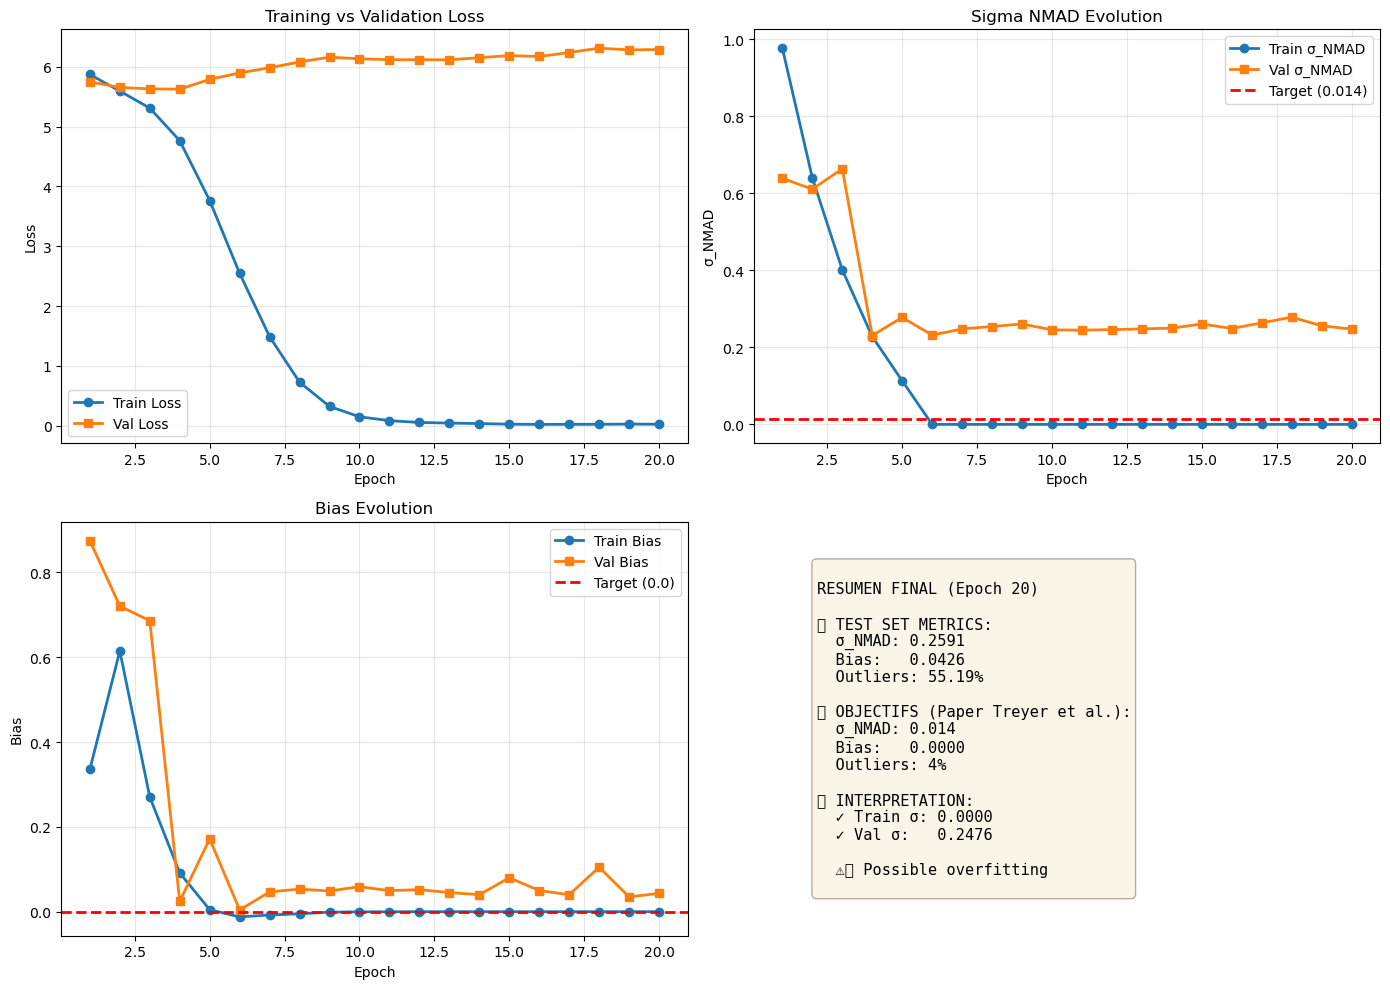


 Gráficas generadas. Observa:
  • Loss:
  • σ_NMAD: debe acercarse a 0.014 (del paper)
  • Bias: 
  • Si val_sigma > train_sigma: on a du overfitting


In [26]:
import matplotlib.pyplot as plt

# Crear figura con 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

epochs_range = range(1, len(history['train_loss']) + 1)

# 1. Loss (train vs val)
axes[0, 0].plot(epochs_range, history['train_loss'], marker='o', label='Train Loss', linewidth=2)
axes[0, 0].plot(epochs_range, history['val_loss'], marker='s', label='Val Loss', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Training vs Validation Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Sigma NMAD (train vs val)
axes[0, 1].plot(epochs_range, history['train_sigma'], marker='o', label='Train σ_NMAD', linewidth=2)
axes[0, 1].plot(epochs_range, history['val_sigma'], marker='s', label='Val σ_NMAD', linewidth=2)
axes[0, 1].axhline(y=0.014, color='r', linestyle='--', label='Target (0.014)', linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('σ_NMAD')
axes[0, 1].set_title('Sigma NMAD Evolution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Bias (train vs val)
axes[1, 0].plot(epochs_range, history['train_bias'], marker='o', label='Train Bias', linewidth=2)
axes[1, 0].plot(epochs_range, history['val_bias'], marker='s', label='Val Bias', linewidth=2)
axes[1, 0].axhline(y=0.0, color='r', linestyle='--', label='Target (0.0)', linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Bias')
axes[1, 0].set_title('Bias Evolution')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Resumen
axes[1, 1].axis('off')
summary_text = f"""
RESUMEN FINAL (Epoch {len(history['train_loss'])})

📊 TEST SET METRICS:
  σ_NMAD: {test_results['sigma_nmad']:.4f}
  Bias:   {test_results['bias']:.4f}
  Outliers: {test_results['outlier_fraction']:.2%}

🎯 OBJECTIFS (Paper Treyer et al.):
  σ_NMAD: 0.014
  Bias:   0.0000
  Outliers: 4%

💡 INTERPRETATION:
  ✓ Train σ: {history['train_sigma'][-1]:.4f}
  ✓ Val σ:   {history['val_sigma'][-1]:.4f}
  
  {"✅ Overfitting controlee" if history['val_sigma'][-1] < history['train_sigma'][-1] * 1.1 else "⚠️ Possible overfitting"}
"""
axes[1, 1].text(0.1, 0.5, summary_text, fontsize=11, family='monospace',
                verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

print("\n Gráficas generadas. Observa:")
print("  • Loss:")
print("  • σ_NMAD: debe acercarse a 0.014 (del paper)")
print("  • Bias: ")
print("  • Si val_sigma > train_sigma: on a du overfitting")
